## Mahindra First Choice Data Analysis

### Problem Statements
    1. Geolocation Based Customer Analysis
        * Explore how various factors like make, model, time & type of service, etc vary with location.
            * Identifying the ownership pattern of cars throughout the country.
            * This also captures the problem wherein information regarding the spending patterns can be identified.
        * Identify the type of order each state receives and present it as an interactive visualization.
    2. Market Segmentation
        * Divide market of potential customers into internally homogeneous and mutually heterogeneous groups or segments.
            * To be based on different characteristics captured in the data.
     3. Customer Lifetime value prediction

#### Further Problem Statements
    1. Inventory Management and Recommendation
    2. Marketing Recommendation
    3. Customer Prediction

### The Data

* Dataset contains the following:
    1. Customer Data
    2. Invoice Data
    3. Joint Technical Data
    4. Plant Master

### Data Cleaning and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import string
import sys
import time
import warnings

from matplotlib import pyplot as plt
from scipy import stats
from my_utils import *

warnings.filterwarnings("ignore")
np.set_printoptions(threshold=sys.maxsize)

In [2]:
jtd = pd.read_csv("redacted/data/JTD.csv")

#### JTD

In [4]:
jtd.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [5]:
jtd.head(1).T

,0
DBM Order,22385
Order Item,180
Material,OSLCC_SRV31
Labor Value Number,NaN
Description,MACHINING RR.SUSPENSION CHARGE (MAJOR)
Item Category,P010
Order Quantity,1.2
Target quantity UoM,MIN
Net value,1869.87


In [6]:
jtd['DBM Order'].nunique()
len(jtd)
jtd['DBM Order'].nunique() / len(jtd)

973473

5619484

0.17323174156203666

* `DBM Order` corresponds to the `Job Card No` in `Invoice`.
* Multiple entries in `JTD` mean that for most orders, multiple parts were used and each has been duly noted.

* `"SRV"` in `JTD['Material']` may refer to `Store Receipt Voucher`.

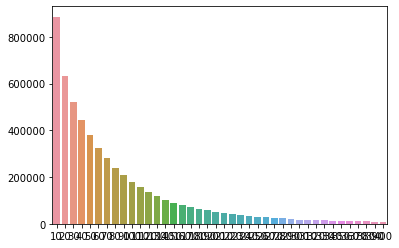

In [7]:
_ = jtd['Order Item'].value_counts().iloc[:40]

sns.barplot(x=_.index, y=_.values)
# set_x_tick_labels(multiples=50)

* Data in `Order Item` has an exponential distribution.

In [8]:
jtd['Item Category'].value_counts()

P002    3250293
P001    1845451
P011     343288
P010     128823
G2TX      51629
Name: Item Category, dtype: int64

In [9]:
jtd['Target quantity UoM'].value_counts()

EA     2745660
MIN    2317562
L       504597
GRO         36
Name: Target quantity UoM, dtype: int64

Seem to be 'Each', 'Minimum', 'Litre' and 'Gross'

<Figure size 864x432 with 0 Axes>

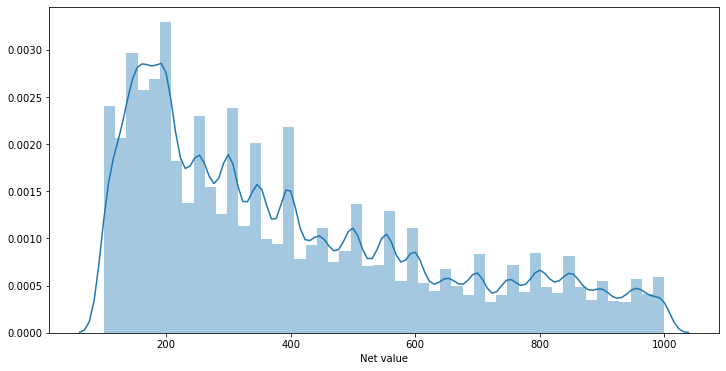

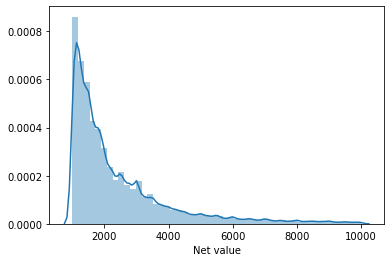

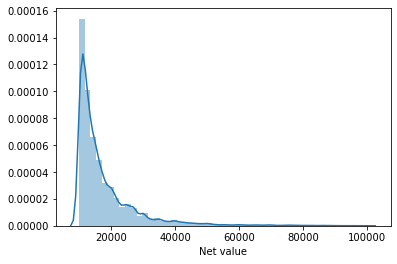

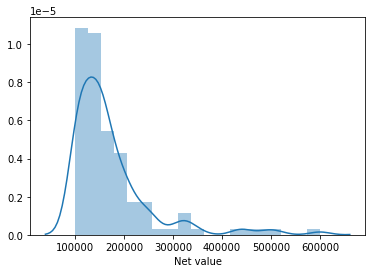

In [26]:
plt.figure(figsize=(12, 6))
sns.distplot(jtd[jtd['Net value'].between(100, 1000)]['Net value'])
plt.show()
sns.distplot(jtd[jtd['Net value'].between(1000, 10000)]['Net value'])
plt.show()
sns.distplot(jtd[jtd['Net value'].between(10000, 100000)]['Net value'])
plt.show()
sns.distplot(jtd[jtd['Net value'].between(100000, 1000000)]['Net value'])

* `Net value` has an exponential distribution. This may help in clustering the different kind of repairs.
* Data in `UoM` and `Order Quantity` is very dirty and due to no contextual aid, they will not be considered.
* Instead, `Net Value` will be used as a substitute wherever applicable.